In [1]:
import gzip
import random
import string
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
def parse(f):
    for l in gzip.open(f):
        yield eval(l)
dataset = list(parse('train_Category.json.gz'))

In [3]:
def readJSON(path):
    for l in gzip.open(path, 'rt'):
        d = eval(l)
        u = d['userID']
        try:
            g = d['gameID']
        except Exception as e:
            g = None
        yield u,g,d
dataset

[{'userID': 'u74382925',
  'genre': 'Adventure',
  'early_access': False,
  'reviewID': 'r75487422',
  'hours': 4.1,
  'text': 'Short Review:\nA good starting chapter for this series, despite the main character being annoying (for now) and a short length. The story is good and actually gets more interesting. Worth the try.\nLong Review:\nBlackwell Legacy is the first on the series of (supposedly) 5 games that talks about the main protagonist, Rosangela Blackwell, as being a so called Medium, and in this first chapter we get to know how her story will start and how she will meet her adventure companion Joey...and really, that\'s really all for for now and that\'s not a bad thing, because in a way this game wants to show how hard her new job is, and that she cannot escape her destiny as a medium.\nMy biggest complain for this chapter, except the short length, it\'s the main protagonist being a "bit" too annoying to be likeable, and most of her dialogues will always be about complaining o

In [4]:
#shuffling data
random.shuffle(dataset)
len(dataset)

175000

In [5]:
train_set, validation_set = train_test_split(dataset, test_size=0.05714, random_state=42)

In [6]:
train_set

[{'userID': 'u30323275',
  'genre': 'RPG',
  'early_access': False,
  'reviewID': 'r90796914',
  'hours': 2.7,
  'text': 'Still good',
  'genreID': 2,
  'date': '2017-11-26'},
 {'userID': 'u86529299',
  'genre': 'Action',
  'early_access': False,
  'reviewID': 'r48075949',
  'hours': 31.6,
  'text': 'Nice mood, nice characters and excellent replayablility. Never been a Hitman franchise fan, but this game amazed me. Unlike previous titles, which suffered from clunky and confusing mechanics, this game appealls for all kinds of players.',
  'genreID': 0,
  'date': '2012-11-23'},
 {'userID': 'u49996509',
  'genre': 'Action',
  'early_access': False,
  'reviewID': 'r31188434',
  'hours': 3.6,
  'text': 'short but REALLY awesome :)',
  'genreID': 0,
  'date': '2017-02-05'},
 {'userID': 'u87031443',
  'genre': 'Action',
  'early_access': False,
  'reviewID': 'r00116053',
  'hours': 0.2,
  'text': 'Pretty kewl squad based shooter.\nTold in a Band of Brothers style, got some light tactical elem

6. Using the review data (train Category.json.gz), build training/validation sets consisting of 165,000/10,000 reviews. We’ll start by building features to represent common words. Start by removing punctuation and capitalization, and finding the 1,000 most common words across all reviews (‘text’ field) in the training set. See the ‘text mining’ lectures for code for this process. Report the 10 most common words, along with their frequencies (1 mark).

In [7]:
#Unique words in the train set
wordCount = defaultdict(int)
for d in train_set:
    for w in d['text'].split():
        wordCount[w] += 1
len(wordCount)

348881

In [8]:
### Ignore capitalization and remove punctuation

wordCount = defaultdict(int)
punctuation = set(string.punctuation)
for d in train_set:
    r = ''.join([c for c in d['text'].lower() if not c in punctuation])
    for w in r.split():
        wordCount[w] += 1
len(wordCount)

154853

In [9]:
### Just take the most popular words...
counts = [(wordCount[w], w) for w in wordCount]
counts.sort()
counts.reverse()

common_1000_words = [(x[0], x[1]) for x in counts[:1000]]
common_10_words = [(x[0], x[1]) for x in counts[:10]]
common_10_words

[(543070, 'the'),
 (317015, 'and'),
 (305287, 'a'),
 (291971, 'to'),
 (245299, 'game'),
 (226773, 'of'),
 (208023, 'is'),
 (200587, 'you'),
 (196122, 'i'),
 (191059, 'it')]

7. Build bag-of-words feature vectors by counting the instances of these 1,000 words in each review. Set the labels (y) to be the ‘genreID’ column for the training instances. You may use these labels directly with sklearn’s LogisticRegression model, which will automatically perform multiclass classification. Report performance on your validation set (1 mark).

In [10]:
words = [x[1] for x in counts[:1000]]
wordId = dict(zip(words, range(len(words))))
wordSet = set(words)
X = []
bag_of_words = [0 for y in range(1000)]
for d in validation_set:
    for w in d['text'].split():
        if w in wordSet:
            bag_of_words[wordId[w]] += 1
    X.append(bag_of_words)
    bag_of_words = [0 for y in range(1000)]

y = [d['genreID'] for d in validation_set]

clf = LogisticRegression(random_state=0, solver='lbfgs', max_iter=10000).fit(X, y)
predict_output = clf.predict(X)

In [11]:
count = 0
for i in range(len(predict_output)):
    if predict_output[i] == y[i]:
        count += 1
accuracy = count / len(predict_output)
accuracy

0.7137

8. Try to improve upon the performance of the above classifier by using different dictionary sizes, or changing the regularization constant C passed to the logistic regression model. Report the performance of your solution, and upload it to Kaggle (1 mark).

In [ ]:
clf = LogisticRegression(random_state=0, solver='lbfgs', max_iter=10000, C=100).fit(X, y)
predict_output = clf.predict(X)
predict_output

In [ ]:
count = 0
for i in range(len(predict_output)):
    if predict_output[i] == y[i]:
        count += 1
accuracy = count / len(predict_output)
accuracy

In [ ]:
### Category prediction baseline: Just consider some of the most common words from each category
catDict = {
  "Action": 0,
  "Strategy": 1,
  "RPG": 2,
  "Adventure": 3,
  "Sport": 4
}

predictions = open("predictions_Category.txt", 'w')
predictions.write("userID-reviewID,prediction\n")
a = []
X = []
y = []
for u,_,data in readJSON("test_Category.json.gz"):
    words = [x[1] for x in counts[:1000]]
    wordId = dict(zip(words, range(len(words))))
    wordSet = set(words)
    bag_of_words = [0 for y in range(1000)]
    for w in data['text'].split():
        if w in wordSet:
            bag_of_words[wordId[w]] += 1
    X.append(bag_of_words)
    bag_of_words = [0 for y in range(1000)]
    
predict_output = clf.predict(X)  

predictions = open("predictions_Category.txt", 'w')
predictions.write("userID-reviewID,prediction\n")
count = 0
for u,_,d in readJSON("test_Category.json.gz"):
    predictions.write(u + '-' + d['reviewID'] + "," + str(predict_output[count]) + "\n")
    count += 1
predictions.close()

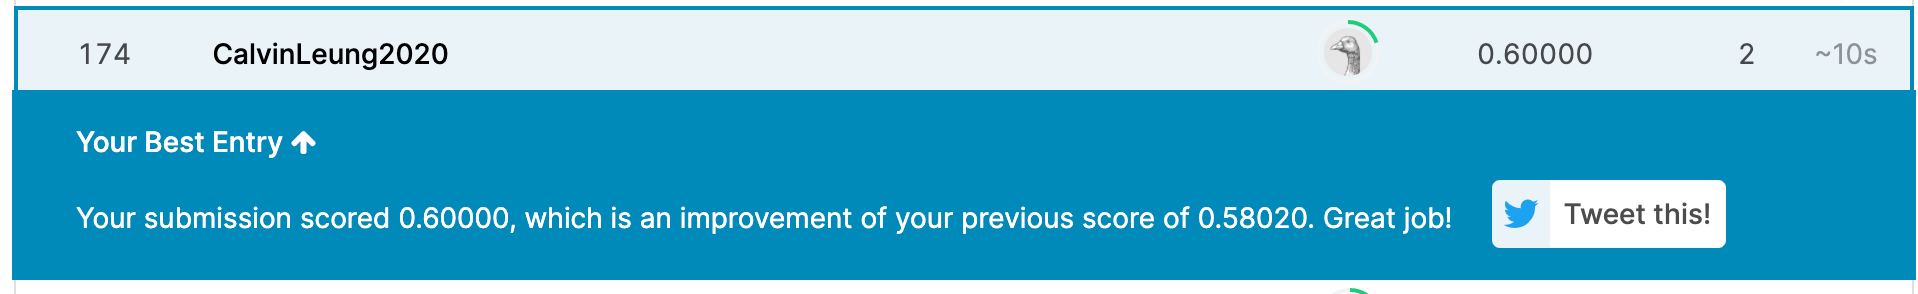